## EDA

- GPT가 자주 쓴 단어를 살펴본다
- 문장의 길이나 토큰의 길이에 차이가 있는지?
- 단어의 분포 (가설: 인간이 쓰는 단어의 분포가 GPT가 생성한 단어들의 분포보다 더 넓지 않을까?)
- 단어가 반복되지는 않는가? (N-gram?)

In [ ]:
path = "/content/drive/MyDrive/2024 K-NET 부없프/AI_Human.csv"

In [ ]:
import pandas as pd

df = pd.read_csv(path)
df

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0
...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0
487231,The whole purpose of democracy is to create a ...,0.0
487232,I firmly believe that governments worldwide sh...,1.0
487233,I DFN't agree with this decision because a LFT...,0.0


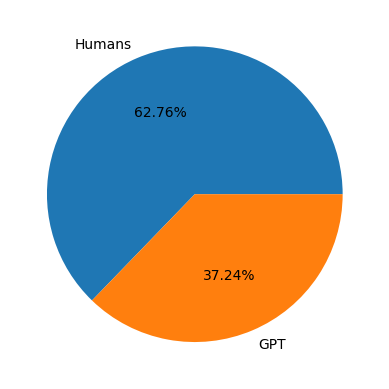

In [ ]:
import matplotlib.pyplot as plt

ratio = [len(df[df['generated']==0.0]), len(df[df['generated']==1.0])]
labels = ['Humans', 'GPT']
plt.pie(ratio, labels=labels, autopct='%.2f%%')
plt.show()

- 약간의 클래스 불균형이 보이지만 학습에 큰 지장을 줄 정도는 아니라 판단
- 오버샘플링이나 언더샘플링 등은 하지 않기로 함

In [ ]:
df['length_of_sentence'] = df['text'].apply(lambda x: len(x))
df

,text,generated,length_of_sentence
0,Cars. Cars have been around since they became ...,0.0,3289
1,Transportation is a large necessity in most co...,0.0,2738
2,"""America's love affair with it's vehicles seem...",0.0,4428
3,How often do you ride in a car? Do you drive a...,0.0,4013
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698
...,...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0,968
487231,The whole purpose of democracy is to create a ...,0.0,2319
487232,I firmly believe that governments worldwide sh...,1.0,2392
487233,I DFN't agree with this decision because a LFT...,0.0,1668


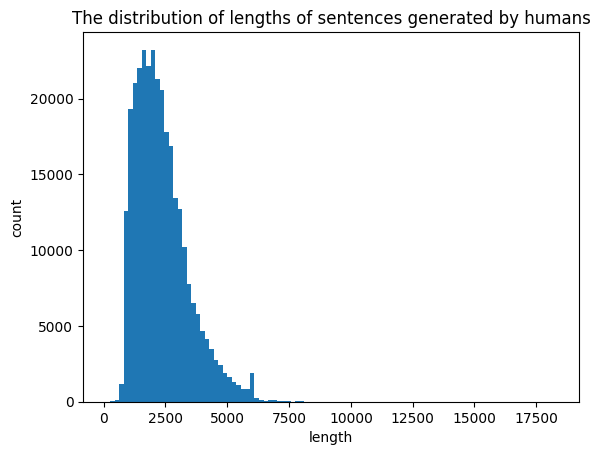

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df[df['generated']==0.0]['length_of_sentence'], bins=100)
plt.title("The distribution of lengths of sentences generated by humans")
plt.xlabel("length")
plt.ylabel("count")
plt.show()

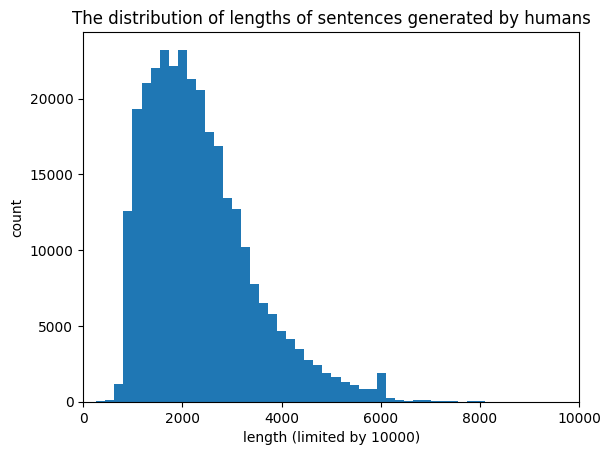

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df[df['generated']==0.0]['length_of_sentence'], bins=100)
plt.title("The distribution of lengths of sentences generated by humans")
plt.xlabel("length (limited by 10000)")
plt.ylabel("count")
plt.xlim([0, 10000])
plt.show()

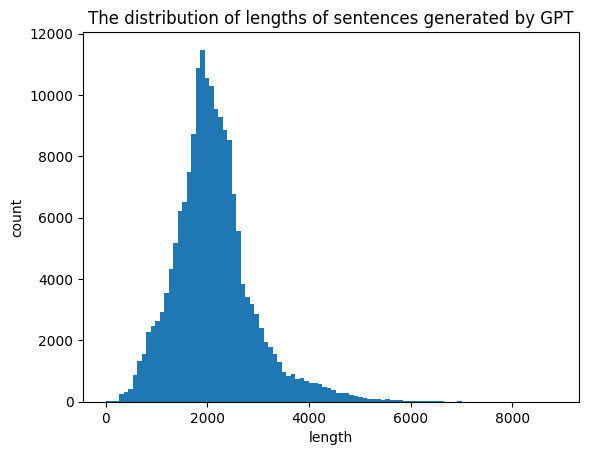

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df[df['generated']==1.0]['length_of_sentence'], bins=100)
plt.title("The distribution of lengths of sentences generated by GPT")
plt.xlabel("length")
plt.ylabel("count")
plt.show()

In [ ]:
df.groupby('generated').count()

,text,length_of_sentence
generated,,
0.0,305797,305797
1.0,181438,181438


In [ ]:
df_temp = df[['generated', 'length_of_sentence']]

df_temp.groupby('generated').median()

,length_of_sentence
generated,
0.0,2156.0
1.0,2048.0


- 인간이 유독 짧은 문장을 선호한다. (좌측으로 skewed)
- 인간이 필요하다면 긴 문장을 쓰기도 한다. (outlier)
- GPT가 생성한 문장의 분포는 다소 대칭적이다.
- 중앙값은 비슷함.

In [ ]:
# 대문자 비율 확인
def count_capital_letters(sentence):
    count = 0
    for char in sentence:
        if char.isupper():
            count += 1
    return count

df['the_number_of_capital_letters'] = df['text'].apply(count_capital_letters)
df

,text,generated,length_of_sentence,the_number_of_capital_letters
0,Cars. Cars have been around since they became ...,0.0,3289,59
1,Transportation is a large necessity in most co...,0.0,2738,46
2,"""America's love affair with it's vehicles seem...",0.0,4428,62
3,How often do you ride in a car? Do you drive a...,0.0,4013,77
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698,74
...,...,...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0,968,29
487231,The whole purpose of democracy is to create a ...,0.0,2319,38
487232,I firmly believe that governments worldwide sh...,1.0,2392,36
487233,I DFN't agree with this decision because a LFT...,0.0,1668,187


In [ ]:
df['capitalisation_ratio'] = df['the_number_of_capital_letters'] / df['length_of_sentence']
df

,text,generated,length_of_sentence,the_number_of_capital_letters,capitalisation_ratio
0,Cars. Cars have been around since they became ...,0.0,3289,59,0.017939
1,Transportation is a large necessity in most co...,0.0,2738,46,0.016801
2,"""America's love affair with it's vehicles seem...",0.0,4428,62,0.014002
3,How often do you ride in a car? Do you drive a...,0.0,4013,77,0.019188
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698,74,0.015751
...,...,...,...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0,968,29,0.029959
487231,The whole purpose of democracy is to create a ...,0.0,2319,38,0.016386
487232,I firmly believe that governments worldwide sh...,1.0,2392,36,0.015050
487233,I DFN't agree with this decision because a LFT...,0.0,1668,187,0.112110


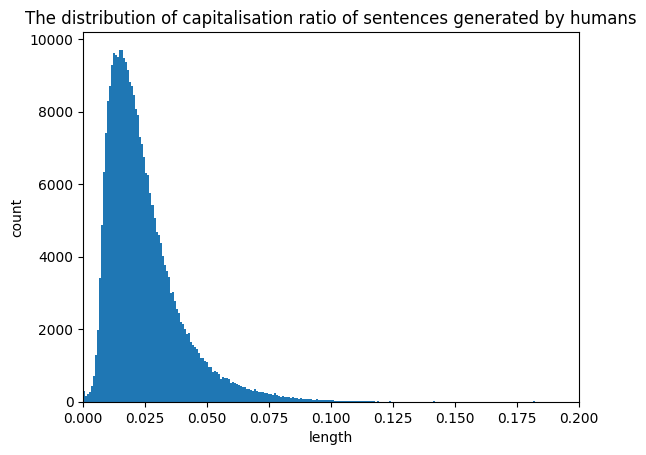

In [ ]:
plt.hist(df[df['generated']==0.0]['capitalisation_ratio'], bins=1000)
plt.title("The distribution of capitalisation ratio of sentences generated by humans")
plt.xlabel("length")
plt.ylabel("count")
plt.xlim([0, 0.2])
plt.show()

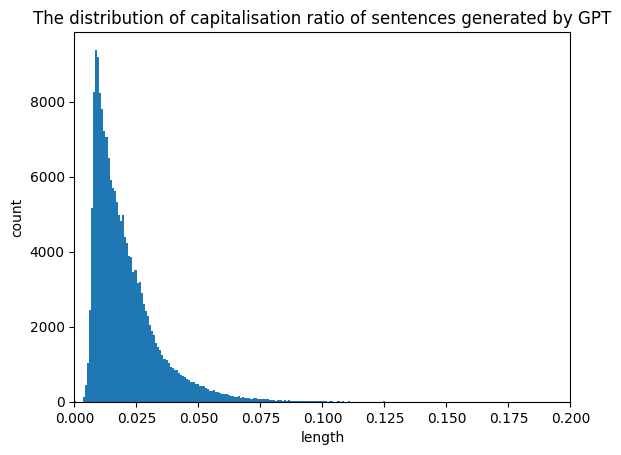

In [ ]:
plt.hist(df[df['generated']==1.0]['capitalisation_ratio'], bins=200)
plt.title("The distribution of capitalisation ratio of sentences generated by GPT")
plt.xlabel("length")
plt.ylabel("count")
plt.xlim([0, 0.2])
plt.show()

In [ ]:
df_temp = df[['generated', 'capitalisation_ratio']]

df_temp.groupby('generated').mean(), df_temp.groupby('generated').median()

(           capitalisation_ratio
 generated                      
 0.0                    0.024864
 1.0                    0.020435,
            capitalisation_ratio
 generated                      
 0.0                    0.020788
 1.0                    0.016780)

- 베타 분포와 비슷해보임
- 평균값, 중앙값도 비슷하지만 약간의 차이가 난다
- 0.000을 기준으로 사람 > GPT -> 'uncased' 대신 'cased'를 쓰는 것으로 결정 (혹시 모르니까)

In [ ]:
# 구두점의 비율
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def count_punctuations(sentence):
    count = 0
    for char in sentence:
        if char in string.punctuation:
            count += 1
    return count

df['the_number_of_punctuations'] = df['text'].apply(count_punctuations)
df

,text,generated,length_of_sentence,the_number_of_capital_letters,capitalisation_ratio,the_number_of_punctuations
0,Cars. Cars have been around since they became ...,0.0,3289,59,0.017939,75
1,Transportation is a large necessity in most co...,0.0,2738,46,0.016801,64
2,"""America's love affair with it's vehicles seem...",0.0,4428,62,0.014002,101
3,How often do you ride in a car? Do you drive a...,0.0,4013,77,0.019188,124
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698,74,0.015751,110
...,...,...,...,...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0,968,29,0.029959,16
487231,The whole purpose of democracy is to create a ...,0.0,2319,38,0.016386,46
487232,I firmly believe that governments worldwide sh...,1.0,2392,36,0.015050,58
487233,I DFN't agree with this decision because a LFT...,0.0,1668,187,0.112110,24


In [ ]:
df['punctuation_ratio'] = df['the_number_of_punctuations'] / df['length_of_sentence']
df

,text,generated,length_of_sentence,the_number_of_capital_letters,capitalisation_ratio,the_number_of_punctuations,punctuation_ratio
0,Cars. Cars have been around since they became ...,0.0,3289,59,0.017939,75,0.022803
1,Transportation is a large necessity in most co...,0.0,2738,46,0.016801,64,0.023375
2,"""America's love affair with it's vehicles seem...",0.0,4428,62,0.014002,101,0.022809
3,How often do you ride in a car? Do you drive a...,0.0,4013,77,0.019188,124,0.030900
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698,74,0.015751,110,0.023414
...,...,...,...,...,...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0,968,29,0.029959,16,0.016529
487231,The whole purpose of democracy is to create a ...,0.0,2319,38,0.016386,46,0.019836
487232,I firmly believe that governments worldwide sh...,1.0,2392,36,0.015050,58,0.024247
487233,I DFN't agree with this decision because a LFT...,0.0,1668,187,0.112110,24,0.014388


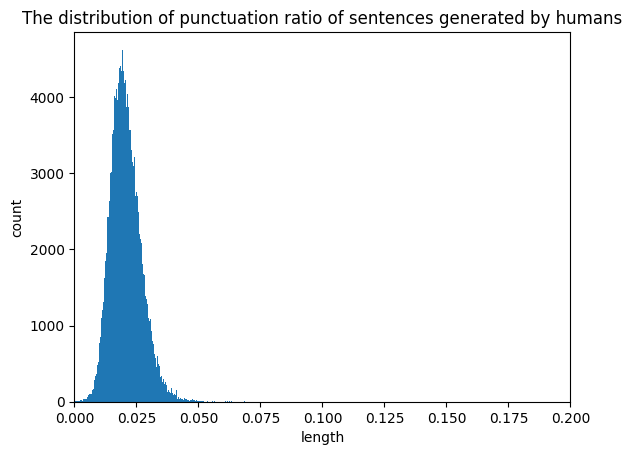

In [ ]:
plt.hist(df[df['generated']==0.0]['punctuation_ratio'], bins=1000)
plt.title("The distribution of punctuation ratio of sentences generated by humans")
plt.xlabel("length")
plt.ylabel("count")
plt.xlim([0, 0.2])
plt.show()

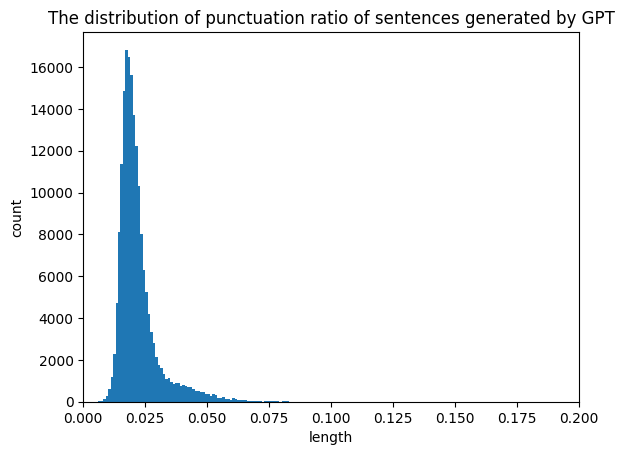

In [ ]:
plt.hist(df[df['generated']==1.0]['punctuation_ratio'], bins=1000)
plt.title("The distribution of punctuation ratio of sentences generated by GPT")
plt.xlabel("length")
plt.ylabel("count")
plt.xlim([0, 0.2])
plt.show()

- 구두점 비율의 분포에 차이가 보임
- 사람의 구두점 비율 분포는 종 모양의 분포를 하고 있음
- GPT의 구두점 비율 분포는 종 모양의 분포가 2개가 섞인 느낌임 (Mixture model)

In [ ]:
def count_exclamation_marks(sentence):
    count = 0
    for char in sentence:
        if char == "!":
            count += 1
    return count

df['the_number_of_exclamation_marks'] = df['text'].apply(count_exclamation_marks)
df['exclamation_mark_ratio'] = df['the_number_of_exclamation_marks'] / df['length_of_sentence']
df

,text,generated,length_of_sentence,the_number_of_capital_letters,capitalisation_ratio,the_number_of_punctuations,punctuation_ratio,the_number_of_exclamation_marks,exclamation_mark_ratio
0,Cars. Cars have been around since they became ...,0.0,3289,59,0.017939,75,0.022803,0,0.000000
1,Transportation is a large necessity in most co...,0.0,2738,46,0.016801,64,0.023375,0,0.000000
2,"""America's love affair with it's vehicles seem...",0.0,4428,62,0.014002,101,0.022809,0,0.000000
3,How often do you ride in a car? Do you drive a...,0.0,4013,77,0.019188,124,0.030900,4,0.000997
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698,74,0.015751,110,0.023414,0,0.000000
...,...,...,...,...,...,...,...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0,968,29,0.029959,16,0.016529,0,0.000000
487231,The whole purpose of democracy is to create a ...,0.0,2319,38,0.016386,46,0.019836,0,0.000000
487232,I firmly believe that governments worldwide sh...,1.0,2392,36,0.015050,58,0.024247,0,0.000000
487233,I DFN't agree with this decision because a LFT...,0.0,1668,187,0.112110,24,0.014388,0,0.000000


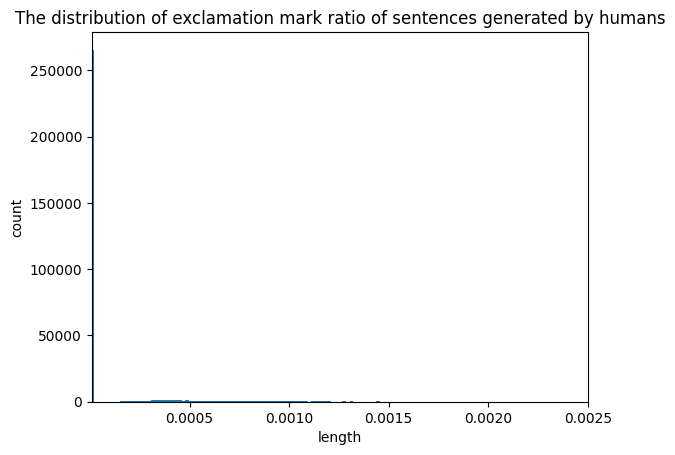

In [ ]:
plt.hist(df[df['generated']==0.0]['exclamation_mark_ratio'], bins=1000)
plt.title("The distribution of exclamation mark ratio of sentences generated by humans")
plt.xlabel("length")
plt.ylabel("count")
plt.xlim([0.00001, 0.0025])
plt.show()

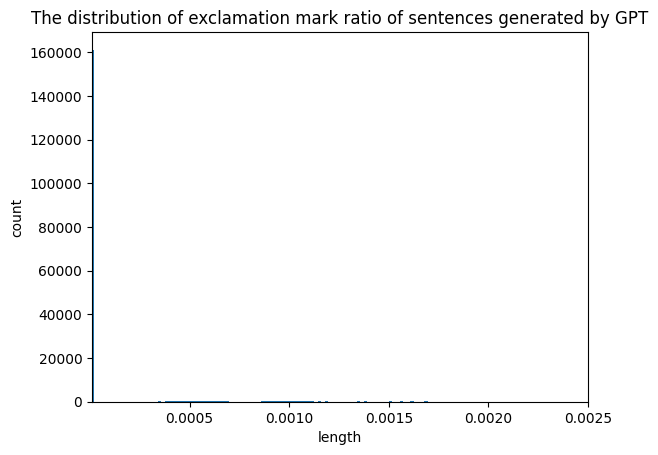

In [ ]:
plt.hist(df[df['generated']==1.0]['exclamation_mark_ratio'], bins=1000)
plt.title("The distribution of exclamation mark ratio of sentences generated by GPT")
plt.xlabel("length")
plt.ylabel("count")
plt.xlim([0.00001, 0.0025])
plt.show()

In [ ]:
df_temp = df[['generated', 'exclamation_mark_ratio']]

df_temp.groupby('generated').mean(), df_temp.groupby('generated').median()

(           exclamation_mark_ratio
 generated                        
 0.0                      0.000134
 1.0                      0.000240,
            exclamation_mark_ratio
 generated                        
 0.0                           0.0
 1.0                           0.0)

In [ ]:
# 느낌표 비율은 0인 문서가 너무 많아서 비교하는 것 자체가 무의미하다고 판단하였음.

In [ ]:
# 메모리 부족으로 인한 샘플링
df_sampled = df.sample(frac=0.1, random_state=42, axis=0, ignore_index=True)

In [ ]:
df_sampled = df_sampled[['text', 'generated']]
df_sampled

,text,generated
0,"Real or Fake Feelings\n\n""Imagine being able t...",0.0
1,Seeking multiple opinions can help you make be...,0.0
2,"ADDRESS_NAME\n\nFebruary 9, 2011\n\nDear TEACH...",0.0
3,"Dear, TEACHER_NAME,\n\nTEACHER_NAME I Believe ...",0.0
4,Do you believe that there is a computer that c...,0.0
...,...,...
48719,I thing that the Facial Action Coding System o...,0.0
48720,If all the students are all c student she shou...,0.0
48721,“The Face on Mars”: A Natural Landform or Alie...,1.0
48722,"Dear Senator,\n\nI am writing to you today to ...",1.0


In [ ]:
df_sampled.groupby('generated').count()

,text
generated,
0.0,30496
1.0,18228


In [ ]:
from transformers import DistilBertTokenizer
tokenizer_cased = DistilBertTokenizer.from_pretrained('distilbert-base-cased')
tokenizer_uncased = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# uncased: 대소문자 구분 없음  & cased: 대소문자 구분

In [ ]:
def tokenizer_fn(sentence):
    return tokenizer_cased.tokenize(sentence)

In [ ]:
# df_sampled['splitted_text'] = df_sampled['text'].str.split()
# df_sampled

In [ ]:
# around 7~9m
df_sampled['tokenized_text'] = df_sampled['text'].apply(tokenizer_fn)

In [ ]:
df_sampled

,text,generated,tokenized_text
0,"Real or Fake Feelings\n\n""Imagine being able t...",0.0,"[Real, or, F, ##ake, Feeling, ##s, "", Imagine,..."
1,Seeking multiple opinions can help you make be...,0.0,"[See, ##king, multiple, opinions, can, help, y..."
2,"ADDRESS_NAME\n\nFebruary 9, 2011\n\nDear TEACH...",0.0,"[AD, ##DR, ##ES, ##S, _, N, ##AM, ##E, Februar..."
3,"Dear, TEACHER_NAME,\n\nTEACHER_NAME I Believe ...",0.0,"[Dear, ,, T, ##EA, ##CH, ##ER, _, N, ##AM, ##E..."
4,Do you believe that there is a computer that c...,0.0,"[Do, you, believe, that, there, is, a, compute..."
...,...,...,...
48719,I thing that the Facial Action Coding System o...,0.0,"[I, thing, that, the, F, ##ac, ##ial, Action, ..."
48720,If all the students are all c student she shou...,0.0,"[If, all, the, students, are, all, c, student,..."
48721,“The Face on Mars”: A Natural Landform or Alie...,1.0,"[“, The, Face, on, Mars, ”, :, A, Natural, Lan..."
48722,"Dear Senator,\n\nI am writing to you today to ...",1.0,"[Dear, Senator, ,, I, am, writing, to, you, to..."


In [ ]:
def tokenizer_fn_uncased(sentence, case=False):
    return tokenizer_uncased.tokenize(sentence)

df_sampled['tokenized_text_uncased'] = df_sampled['text'].apply(tokenizer_fn_uncased)

In [ ]:
df_sampled

,text,generated,tokenized_text,tokenized_text_uncased
0,"Real or Fake Feelings\n\n""Imagine being able t...",0.0,"[Real, or, F, ##ake, Feeling, ##s, "", Imagine,...","[real, or, fake, feelings, "", imagine, being, ..."
1,Seeking multiple opinions can help you make be...,0.0,"[See, ##king, multiple, opinions, can, help, y...","[seeking, multiple, opinions, can, help, you, ..."
2,"ADDRESS_NAME\n\nFebruary 9, 2011\n\nDear TEACH...",0.0,"[AD, ##DR, ##ES, ##S, _, N, ##AM, ##E, Februar...","[address, _, name, february, 9, ,, 2011, dear,..."
3,"Dear, TEACHER_NAME,\n\nTEACHER_NAME I Believe ...",0.0,"[Dear, ,, T, ##EA, ##CH, ##ER, _, N, ##AM, ##E...","[dear, ,, teacher, _, name, ,, teacher, _, nam..."
4,Do you believe that there is a computer that c...,0.0,"[Do, you, believe, that, there, is, a, compute...","[do, you, believe, that, there, is, a, compute..."
...,...,...,...,...
48719,I thing that the Facial Action Coding System o...,0.0,"[I, thing, that, the, F, ##ac, ##ial, Action, ...","[i, thing, that, the, facial, action, coding, ..."
48720,If all the students are all c student she shou...,0.0,"[If, all, the, students, are, all, c, student,...","[if, all, the, students, are, all, c, student,..."
48721,“The Face on Mars”: A Natural Landform or Alie...,1.0,"[“, The, Face, on, Mars, ”, :, A, Natural, Lan...","[“, the, face, on, mars, ”, :, a, natural, lan..."
48722,"Dear Senator,\n\nI am writing to you today to ...",1.0,"[Dear, Senator, ,, I, am, writing, to, you, to...","[dear, senator, ,, i, am, writing, to, you, to..."


In [ ]:
# EDA에서는 uncased 버전 사용 (단어의 분포)
# 학습 시에는 cased 버전 사용하기로 결정 (대소문자 여부가 중요)

In [ ]:
df_sampled['tokenized_text_uncased']

,tokenized_text_uncased
0,"[real, or, fake, feelings, "", imagine, being, ..."
1,"[seeking, multiple, opinions, can, help, you, ..."
2,"[address, _, name, february, 9, ,, 2011, dear,..."
3,"[dear, ,, teacher, _, name, ,, teacher, _, nam..."
4,"[do, you, believe, that, there, is, a, compute..."
...,...
48719,"[i, thing, that, the, facial, action, coding, ..."
48720,"[if, all, the, students, are, all, c, student,..."
48721,"[“, the, face, on, mars, ”, :, a, natural, lan..."
48722,"[dear, senator, ,, i, am, writing, to, you, to..."


In [ ]:
tokenized_text_uncased = df_sampled['tokenized_text_uncased'].apply(lambda x: tuple(x))
tokenized_text_uncased

,tokenized_text_uncased
0,"(real, or, fake, feelings, "", imagine, being, ..."
1,"(seeking, multiple, opinions, can, help, you, ..."
2,"(address, _, name, february, 9, ,, 2011, dear,..."
3,"(dear, ,, teacher, _, name, ,, teacher, _, nam..."
4,"(do, you, believe, that, there, is, a, compute..."
...,...
48719,"(i, thing, that, the, facial, action, coding, ..."
48720,"(if, all, the, students, are, all, c, student,..."
48721,"(“, the, face, on, mars, ”, :, a, natural, lan..."
48722,"(dear, senator, ,, i, am, writing, to, you, to..."


In [ ]:
tokenized_text_uncased[df_sampled['generated']==0.0]

,tokenized_text_uncased
0,"(real, or, fake, feelings, "", imagine, being, ..."
1,"(seeking, multiple, opinions, can, help, you, ..."
2,"(address, _, name, february, 9, ,, 2011, dear,..."
3,"(dear, ,, teacher, _, name, ,, teacher, _, nam..."
4,"(do, you, believe, that, there, is, a, compute..."
...,...
48717,"(the, author, studies, venus, the, way, some, ..."
48718,"(cars, are, a, main, aspect, in, our, daily, l..."
48719,"(i, thing, that, the, facial, action, coding, ..."
48720,"(if, all, the, students, are, all, c, student,..."


In [ ]:
from collections import Counter

len(Counter(tokenized_text_uncased[df_sampled['generated']==0.0]))

30287

In [ ]:
len(Counter(tokenized_text_uncased[df_sampled['generated']==1.0]))

18201